## Import

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import time
import numpy as np
import scipy.linalg as linalg
import torch
import torch.nn as nn
import torchvision as tv
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
#import preprocess


device = 'cuda:6'

%load_ext autoreload
%autoreload 2

## Dataset

In [ ]:
from distributions.NonlinearGaussian import NonlinearGaussian

n, d = 10000, 16                                 # < higher d, higher MI
true_rho = 0.7                                   # < higher rho, higher MI
case = '1a'                                      # < choose between ['1a', '1b', '2', '3a', '3b', '3c', 'MoG']


dataset = NonlinearGaussian(n_samples=n, n_dims=d, rho=true_rho, mu=0, case=case)
X0, Y0 = dataset.sample_data(n_samples = n)
X, Y = dataset.transformation(X0, Y0)

X, Y = X.to(device), Y.to(device)
Z = torch.cat([X, Y], dim=1)

H = dataset.entropy(Z)

print('Z', Z.size())
print('H', H)

Z torch.Size([10000, 16])
H 14.03483279259165


## Copula estimate

In [ ]:
from GC import GC

gc = GC()
gc.learn(Z)
log_probs = gc.log_probs(Z)

H_gc = -log_probs.mean().item()

print('H', H)
print('H_gc', H_gc)

H 14.03483279259165
H_gc 15.189099311828613


## Visualizing marginals

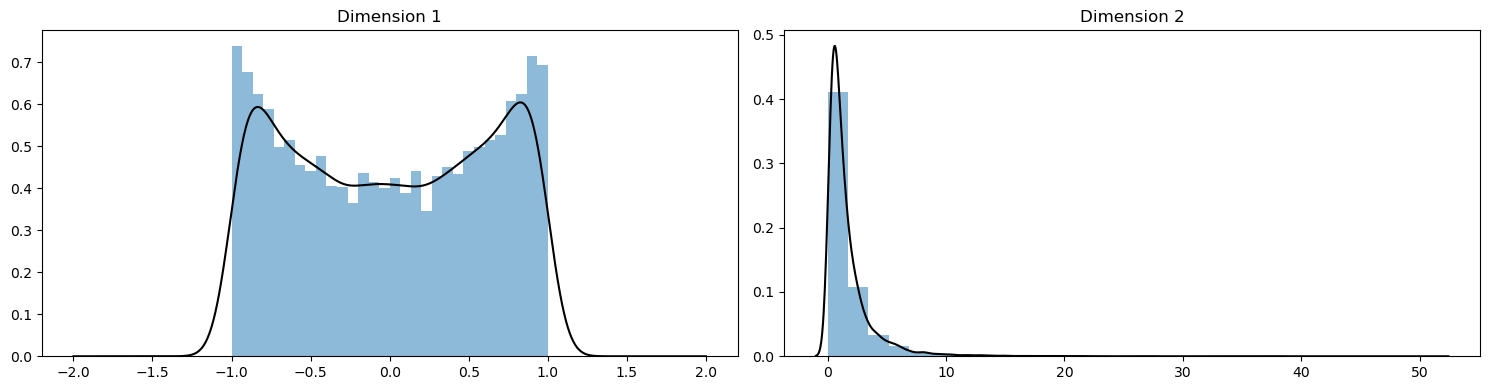

In [74]:
from scipy.stats import gaussian_kde



fig, axes = plt.subplots(1, 2, figsize=(15, 4))  # 1 row, 3 columns

for j in range(2):
    ax = axes[j]
    J = 0 + j*d//2

    x = Z[:, J].cpu().numpy()
    kde = gc.marginals[J]
    x_grid = np.linspace(np.min(x)-1, np.max(x)+1, 1000)
    kde_vals = kde.evaluate(x_grid)

    # Plot histogram
    ax.hist(x, bins=30, density=True, alpha=0.5, label='Histogram')
    
    # Plot KDE
    ax.plot(x_grid, kde_vals, label='KDE', color='black')
    
    ax.set_title(f"Dimension {j+1}")

plt.tight_layout()
plt.show()